In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib as plt
import sklearn


In [ ]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

## Reading dataset

In [2]:
df=pd.read_parquet('../data/interim/Breastclean1.parquet')

## Usaremos pandas profiling para hacer una primera revisión de los datos y ver que estructura tienen

In [3]:
# import pandas profilling lib
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title=" Profiling Report 1",
                        explorative=True, samples=None, correlations=None, 
                        missing_diagrams=None, duplicates=None, interactions=None)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Insights del primer perfilado de datos
- Revisando las columnas del perfilado, se encuentra que casi todas ellas contienen valores muy disimiles en escalas muy diferentes combinando valores entre 0 y 1 con valores de miles , lo cual no tiene sentido en el contexto debido a que estamos hablando de caracteristicas de imagenes de celulas, de manera que en primer lugar, aplicaremos una deteccion de outliers a partir del rango intercuartilico para observar como cambia la distribucion de los datos y haciendo un replace a los datos que estan por fuera de la escala mediante la funcion np.where.

In [4]:
for i in df.columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        df[i]=np.where((df[i] < (Q1 - 1.5 * IQR)) |(df[i] > (Q3 + 1.5 * IQR)),np.nan,df[i])

## Nuevo perfilado despues de aplicar la deteccion de outliers con el rango intercuartilico.

In [5]:
# import pandas profilling lib
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title=" Profiling Report 1",
                        explorative=True, samples=None, correlations=None, 
                        missing_diagrams=None, duplicates=None, interactions=None)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Despues de aplicar la deteccion de outliers con el rango intercuartilico, el perfilado muestra que muchas de las columnas ya se encuentran en rangos que tienen sentido respecto al contexto del analisis, sin embargo algunas columnas  como perimeter_se y texture_se todavia contienen valores extraños que se salen demasiado de los rangos que tienen sentido para el contexto en el que nos encontramos, por lo cual debemos intentar corregir o revisar que sucede con estas columnas para proseguir con el analisis ya que estos valores generaran problemas al aplicar los modelos de clasificacion.

In [ ]:
df['perimeter_se'].sort_values()

In [ ]:
df['perimeter_se'].describe() ##revisando la columna perimeter_se

In [ ]:
df['texture_se'].describe() ##revisando la columna texture_se


In [ ]:
import seaborn as sns
sns.boxplot(x=df["texture_se"])
plt.pyplot.show()

In [ ]:
sns.boxplot(x=df["perimeter_se"])
plt.pyplot.show()

In [ ]:
sns.boxplot(x=df["radius_worst"])
plt.pyplot.show()

In [45]:
df['texture_se'].describe() ##revisando la columna texture_se


count     565.000000
mean      803.022847
std       790.243308
min         0.360200
25%         0.856100
50%      1023.000000
75%      1398.000000
max      2927.000000
Name: texture_se, dtype: float64

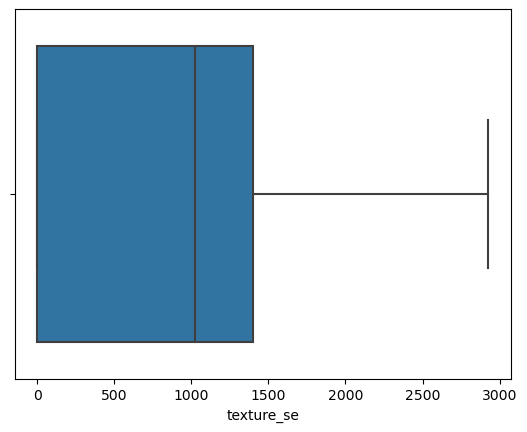

In [46]:
import seaborn as sns
sns.boxplot(x=df["texture_se"])
plt.pyplot.show()

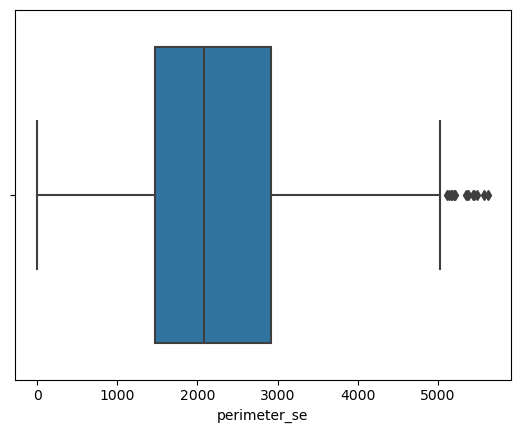

In [47]:
sns.boxplot(x=df["perimeter_se"])
plt.pyplot.show()

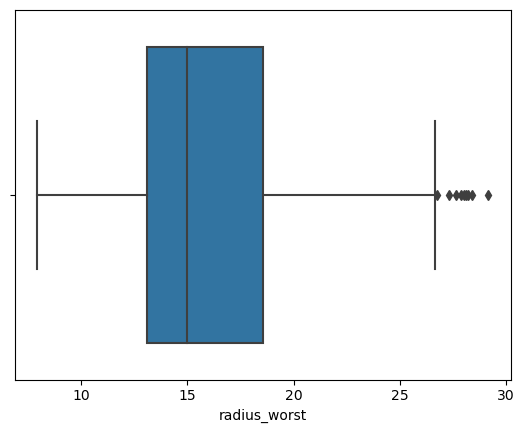

In [48]:
sns.boxplot(x=df["radius_worst"])
plt.pyplot.show()